<a href="https://colab.research.google.com/github/mharrisonbaker/CUNYassignments/blob/master/DATA605_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import pearsonr, skew
from scipy.stats import norm
from scipy.linalg import lu
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression
from sklearn.model_selection import cross_val_score

In [0]:
df = pd.read_csv('/content/drive/My Drive/DATA605/train.csv')

df.shape


(1460, 81)

In [0]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [0]:
for col in df.columns:
  print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


The following categories could be particularly important features: LotArea, Neighbhorhood, YearBuilt, FullBath, HalfBath, BedroomAbvGr, GrLivArea

In [0]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [0]:
#pd.set_option('max_columns', 82)
train_df_top = df.head()
train_df_top

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Distribution of SalePrice')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text major ticklabel objects>)

<Figure size 2160x2160 with 0 Axes>

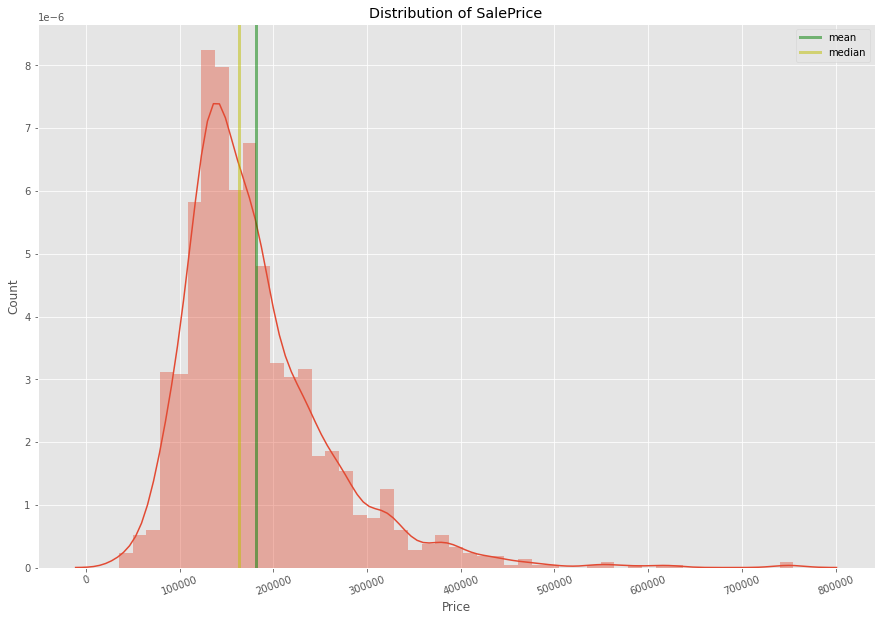

<Figure size 2160x2160 with 0 Axes>

In [0]:
#distribution of sale prices
plt.figure(figsize=(15 ,10))
sns.distplot(df['SalePrice'])
plt.style.use('ggplot')
plt.title('Distribution of SalePrice')
plt.xlabel('Price')
plt.ylabel('Count')
plt.axvline(x=df.SalePrice.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.SalePrice.median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.xticks(rotation=20)
plt.legend(["mean", "median"])
plt.figure(figsize=(30,30))
plt.show()

In [0]:
print("Skewness is %f" % df['SalePrice'].skew())

Skewness is 1.882876


As the plot shows the data is skewed right

In [0]:
print("Kurtosis is %f" % df['SalePrice'].kurt())

Kurtosis is 6.536282


As the plot shows there is a significant central peak, and this kurtosis value shows more of the variance is the result of some relatively extreme deviations (as can be seen in the right tail). 


Text(0.5, 1.0, 'LotArea')

Text(0.5, 1.0, 'Neighborhood')

Text(0.5, 1.0, 'YearBuilt')

Text(0.5, 1.0, 'FullBath')

Text(0.5, 1.0, 'BedroomAbvGr')

Text(0.5, 1.0, 'GrLivArea')

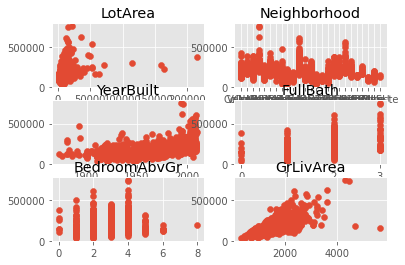

In [0]:
y=df['SalePrice']
x1=df['LotArea']
x2=df['Neighborhood']
x3=df['YearBuilt']
x4=df['FullBath']
x5=df['BedroomAbvGr']
x6=df['GrLivArea']

fig, axs = plt.subplots(3, 2)
axs[0, 0].scatter(x1, y)
axs[0, 0].set_title('LotArea')
axs[0, 1].scatter(x2, y)
axs[0, 1].set_title('Neighborhood')
axs[1, 0].scatter(x3, y)
axs[1, 0].set_title('YearBuilt')
axs[1, 1].scatter(x4, y)
axs[1, 1].set_title('FullBath')
axs[2, 0].scatter(x5, y)
axs[2, 0].set_title('BedroomAbvGr')
axs[2, 1].scatter(x6, y)
axs[2, 1].set_title('GrLivArea')


(0.0, 20000.0)

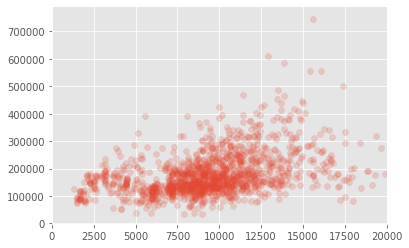

In [0]:
plt.scatter(x=df['LotArea'], y=df['SalePrice'], alpha=0.2)
plt.xlim(0, 20000)

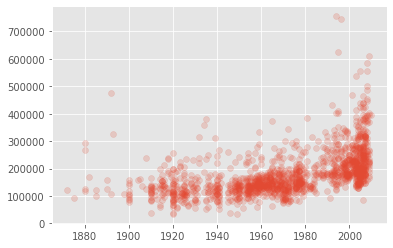

In [0]:
plt.scatter(x=df['YearBuilt'], y=df['SalePrice'], alpha=0.2)

<Figure size 1584x1584 with 0 Axes>

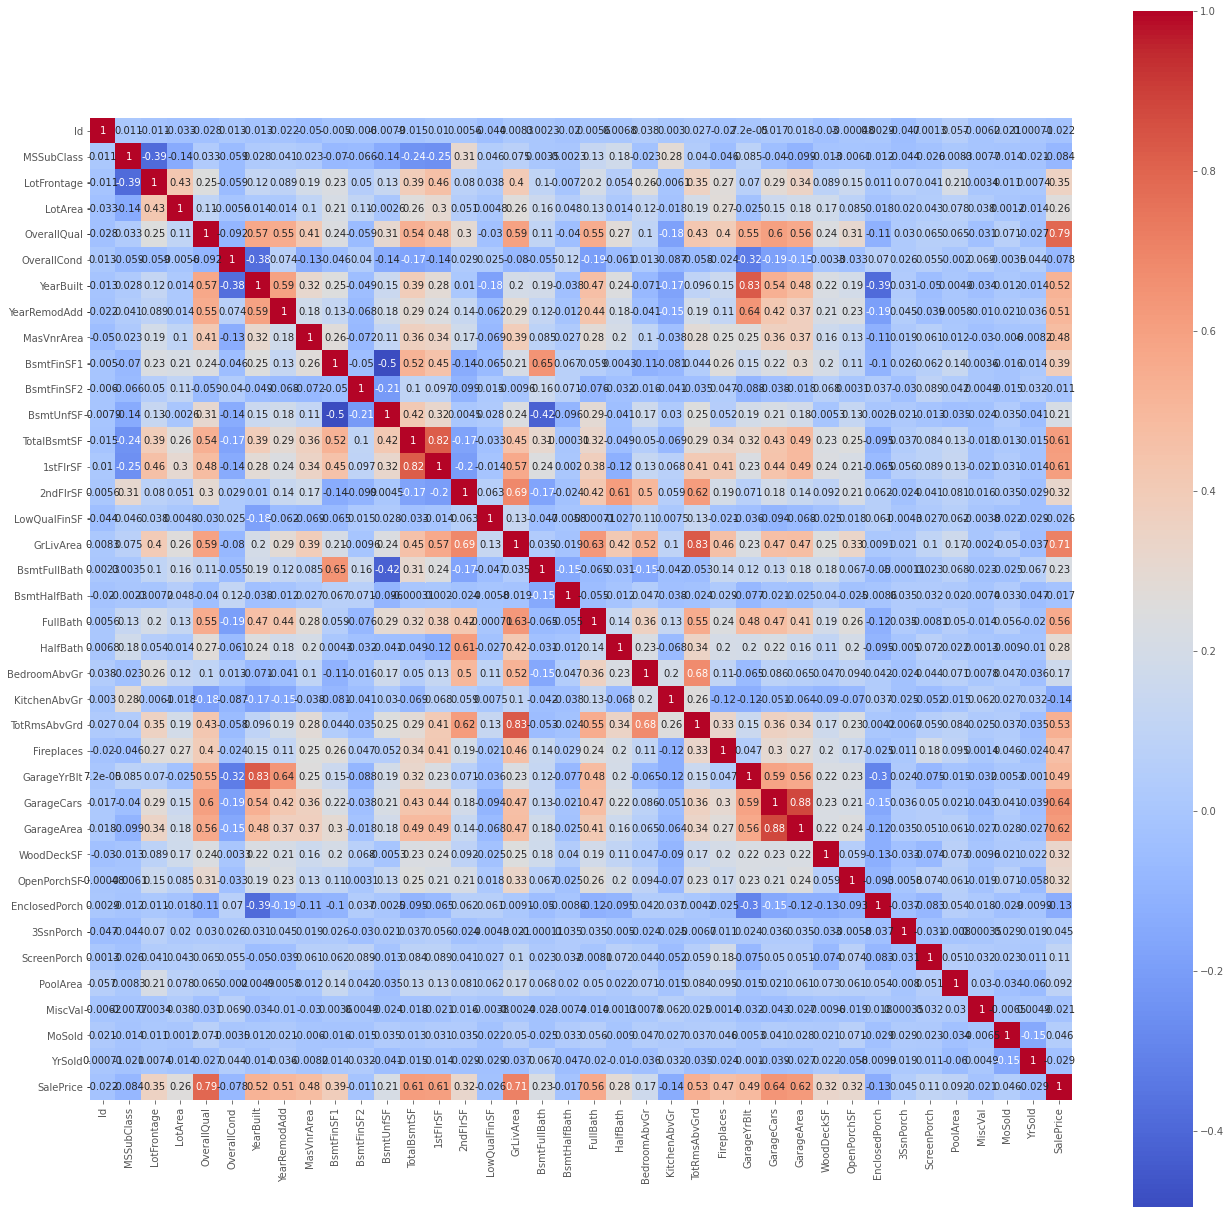

In [0]:
df_slim=df[['SalePrice','LotArea', 'Neighborhood','YearBuilt', 'FullBath', 'BedroomAbvGr', 'GrLivArea']]
correlation = df.corr()
plt.figure(figsize=(22,22))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm')

<Figure size 864x864 with 0 Axes>

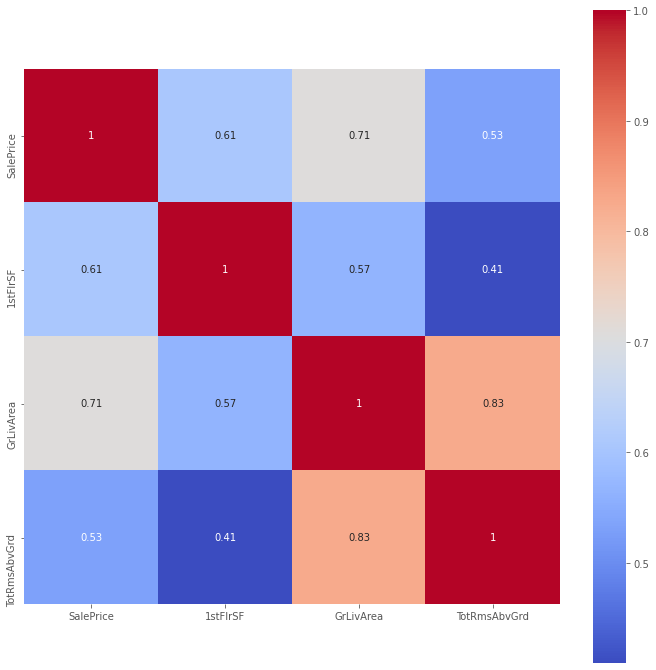

In [0]:
# df_slim=df[['SalePrice','LotArea', 'Neighborhood','YearBuilt', 'FullBath', 'BedroomAbvGr', 'GrLivArea']]
# df_slim=df[['SalePrice','OverallQual', 'YearBuilt', 'GrLivArea', 'FullBath', 'GarageArea', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF']]
df_slim=df[['SalePrice','1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd']]
correlation = df_slim.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm')

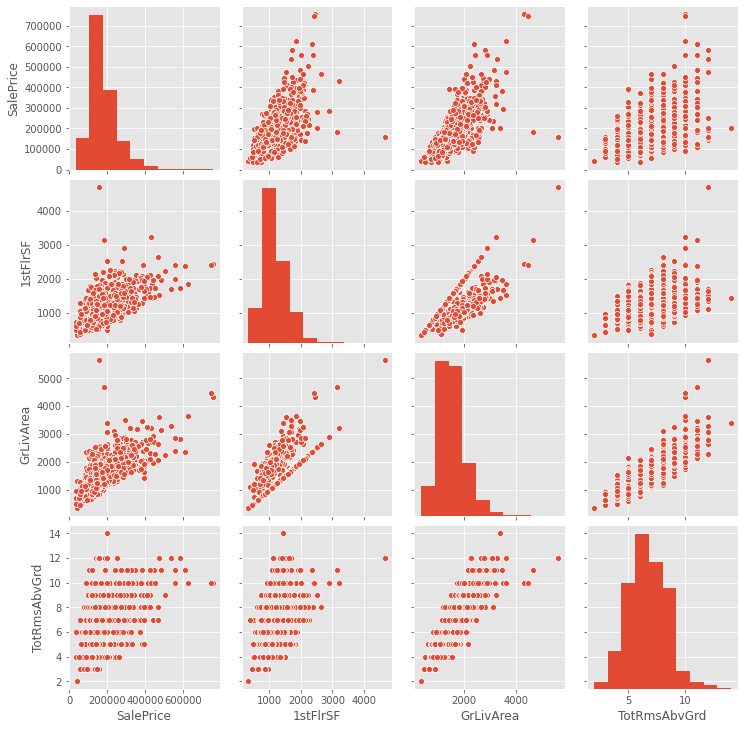

In [0]:
sns.pairplot(df_slim)
#I chose continous numeric variable, that show potential linear relationships with Sales Price, and distributions that resemble a normal distribution.

In [0]:
#I chose continous numeric variable, that show potential linear relationships with Sales Price, and distributions that resemble a normal distribution (eyeball test).
#These properties are good qualifications for Pearson correlation analysis.
saleprice=df['SalePrice']
FirstFlrSF=df['1stFlrSF']
GrLivArea=df['GrLivArea']
TotRmsAbvGrd=df['TotRmsAbvGrd']


In [0]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [0]:
r,p=pearsonr(saleprice, FirstFlrSF)
r,p
print("")
z = np.arctanh(r)
z # z-score
print("")
sigma = (1/((len(df.index)-3)**0.5)) #standard error
cint = z + np.array([-1, 1]) * sigma * norm.ppf((1+0.80)/2) 
np.tanh(cint) #interval values for 80%

(0.6058521846919146, 5.394710618971284e-147)

0.7023419230768353

array([0.58416868, 0.62667147])

The 80% interval is ([0.58416868, 0.62667147]). P value is extremely low and shows moderate positive relationship with high confidence.

In [0]:
r,p=pearsonr(saleprice, GrLivArea)
r,p
print("")
z = np.arctanh(r)
z # z-score
print("")
sigma = (1/((len(df.index)-3)**0.5)) #standard error
cint = z + np.array([-1, 1]) * sigma * norm.ppf((1+0.80)/2) 
np.tanh(cint) #interval values for 80%

(0.7086244776126522, 4.518033646779431e-223)

0.8844155182738844

array([0.69150871, 0.72494504])

The 80% interval is ([0.69150871, 0.72494504]). P value is extremely low and shows moderate positive relationship with high confidence.

In [0]:
r,p=pearsonr(saleprice, TotRmsAbvGrd)
r,p
print("")
z = np.arctanh(r)
z # z-score
print("")
sigma = (1/((len(df.index)-3)**0.5)) #standard error
cint = z + np.array([-1, 1]) * sigma * norm.ppf((1+0.80)/2) 
np.tanh(cint) #interval values for 80%

(0.5337231555820281, 2.772280932958432e-108)

0.5953369744695587

array([0.50928413, 0.55730205])

The 80% interval is ([0.50928413, 0.55730205]). P value is extremely low and shows moderate positive relationship with high confidence.

In [0]:
#correlation matrix as shown above
corrMatrix = df_slim.corr()
corrMatrix

,SalePrice,1stFlrSF,GrLivArea,TotRmsAbvGrd
SalePrice,1.000000,0.605852,0.708624,0.533723
1stFlrSF,0.605852,1.000000,0.566024,0.409516
GrLivArea,0.708624,0.566024,1.000000,0.825489
TotRmsAbvGrd,0.533723,0.409516,0.825489,1.000000


In [0]:
precisionMatrix = pd.DataFrame(np.linalg.pinv(corrMatrix.values), corrMatrix.columns, corrMatrix.index)
precisionMatrix

,SalePrice,1stFlrSF,GrLivArea,TotRmsAbvGrd
SalePrice,2.312078,-0.675386,-1.462057,0.249484
1stFlrSF,-0.675386,1.691711,-0.642353,0.197942
GrLivArea,-1.462057,-0.642353,4.828905,-2.942822
TotRmsAbvGrd,0.249484,0.197942,-2.942822,3.215053


In [0]:
corrMatrix*precisionMatrix

,SalePrice,1stFlrSF,GrLivArea,TotRmsAbvGrd
SalePrice,2.312078,-0.409184,-1.036049,0.133156
1stFlrSF,-0.409184,1.691711,-0.363587,0.081060
GrLivArea,-1.036049,-0.363587,4.828905,-2.429269
TotRmsAbvGrd,0.133156,0.081060,-2.429269,3.215053


In [0]:
multiMatrix=precisionMatrix*corrMatrix
multiMatrix

,SalePrice,1stFlrSF,GrLivArea,TotRmsAbvGrd
SalePrice,2.312078,-0.409184,-1.036049,0.133156
1stFlrSF,-0.409184,1.691711,-0.363587,0.081060
GrLivArea,-1.036049,-0.363587,4.828905,-2.429269
TotRmsAbvGrd,0.133156,0.081060,-2.429269,3.215053


In [0]:
lu(multiMatrix)

(array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [-0.17697676,  1.        ,  0.        ,  0.        ],
        [-0.44810318, -0.33776665,  1.        ,  0.        ],
        [ 0.05759132,  0.06461198, -0.5584481 ,  1.        ]]),
 array([[ 2.31207787, -0.40918404, -1.03604944,  0.13315562],
        [ 0.        ,  1.61929466, -0.54694374,  0.10462583],
        [ 0.        ,  0.        ,  4.17990879, -2.33426212],
        [ 0.        ,  0.        ,  0.        ,  1.89705976]]))

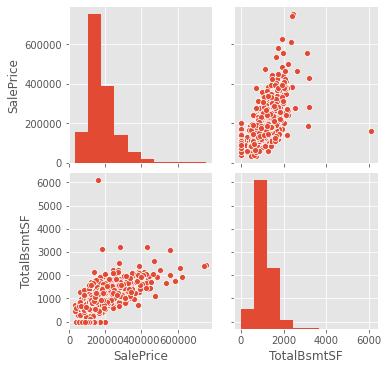

In [0]:
df666=df[['SalePrice','TotalBsmtSF']]
TotalBsmtSF=df['TotalBsmtSF']
sns.pairplot(df666)

In [0]:
df['TotalBsmtSF'].describe()
#shift is not necessary because there are no 

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [0]:
# activate R magic
%reload_ext rpy2.ipython

In [0]:
%%R
library(MASS)
library(stats)
library(dplyr)
library(magrittr)

In [0]:
%%R

dfR <- read.csv("/content/drive/My Drive/DATA605/train.csv", header=T)
fitdistr(dfR$TotalBsmtSF, densfun = "exponential")


       rate    
  9.456896e-04 
 (2.474983e-05)


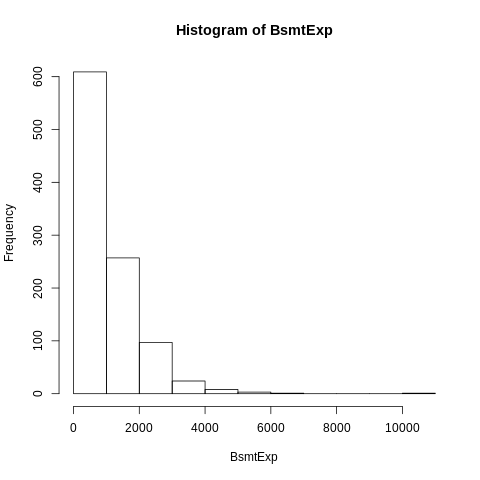

In [0]:
%%R
lam<-9.456896*10^-04 
em<-1/lam
BsmtExp<-(rexp(1000,lam))
hist(BsmtExp)
#the histogram no longer has a left tail, this may be a better representation of the true data because there might be some placeholder data such as "1 sq ft" in the dataframe

In [0]:
%%R
a<- mean(dfR$TotalBsmtSF)
s<- sd(dfR$TotalBsmtSF)
n<-length(dfR$TotalBsmtSF)
error<-qnorm(0.95)*s/sqrt(n)
a+error

# BsmtExp
# quantile(qnorm(BsmtExp), probs=c(.05,.95)) #upperbound of the CI of empircal data, assuming normality

[1] 1076.315


In [0]:
%%R
a-error #lowerbound of the CI of empircal data, assuming normality


[1] 1038.544


In [0]:
%%R
quantile(ecdf(BsmtExp), probs=c(.05,.95)) #quantiles of normal dist of the exponential

       5%       95% 
  60.5688 2819.9803 


In [0]:
%%R
quantile(dfR$TotalBsmtSF, probs=c(.05,.95)) #empirical percentiles of the actual data

    5%    95% 
 519.3 1753.0 


In [0]:
#back to Python...
#add a test scorer, the rules say RMSE b/w log of predicted and observed sales price
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [0]:
# load the test and train data
test = pd.read_csv('/content/drive/My Drive/DATA605/test.csv')
test=test.fillna(test.mean())

train=df
train=train.fillna(train.mean())

#ids for submission
train_id = train['Id']
test_id = test['Id']

#my goal is to make as many features "normal" as possible
alldata=pd.concat([train,test], axis=0) #combine all data


# test=test.drop(['SalePrice'],1) #drop target
# train = train.dtypes[test.dtypes != "object"].index #find numeric data



data_skew = train[data_num].apply(lambda x: skew(x.dropna())) #find very skewed features
data_skew = data_skew[data_skew > 0.90]
data_skew = data_skew.index


train[data_skew] = np.log1p(train[data_skew]) #log scale skewed features

train = pd.get_dummies(train) 
train = train.fillna(train.mean) #replacing NA with mean so the classifier wont throw a fit

#log scale target label
train['SalePrice']=np.log1p(train['SalePrice'])
# 

X=np.array(train.drop(['SalePrice'],1))
y=np.log1p(train['SalePrice'])

# X=preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor=LinearRegression()
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test, y_test)

print("Regressor score", accuracy)
print("RMSE on Training set :", rmse_cv_train(regressor).mean())
print("RMSE on Test set :", rmse_cv_test(regressor).mean())




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Regressor score 0.8577295617566293
RMSE on Training set : 0.010442872591071014
RMSE on Test set : 0.028768635277230274


In [0]:
#Linear Regression using an "eyeball test" from the correlation matrix and outliers from the charts above
dfm=df[['OverallQual', 'YearBuilt', 'GrLivArea', 'FullBath', 'GarageArea', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'SalePrice']]
dfm = dfm.drop(dfm[(dfm['GrLivArea']>4000) & (dfm['SalePrice']<350000)].index)



X=np.array(dfm.drop(['SalePrice'],1))
y=np.log1p(dfm['SalePrice'])
X=preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor=LinearRegression()
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test, y_test)
print("Regressor score", accuracy)
print("RMSE on Training set :", rmse_cv_train(regressor).mean())
print("RMSE on Test set :", rmse_cv_test(regressor).mean())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Regressor score 0.8776653806661405
RMSE on Training set : 0.1612969349361111
RMSE on Test set : 0.15199658448648196


In [0]:
predictor_cols = ['OverallQual', 'YearBuilt', 'GrLivArea', 'FullBath', 'GarageArea', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF']

# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test[predictor_cols]

# Use the model to make predictions
predicted_prices = regressor.predict(test_X)

# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)



[423.08579087 499.31503892 533.62534165 ... 488.40707993 408.23154282
 604.72261528]


In [0]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission2.csv', index=False)